#### Assignment for Week-6: Path Sampling, A firework of algorithm

**A.**

In this Section, we consider a **probability distribution** proportional to, <br>
$\pi(x, y) = \exp[-0.5(x^2 + y^2) - \alpha (x^4 + y^4)]$  <br>
for $|x| \leq 1$  and $|y| \leq 1)$

where $\alpha > 0$ is a fixed parameter and (x,y) is a point  in the "heliport" square with edges $ -1 < x < 1$ and $-1 < y <  1$. You will study different break-ups of $\pi(x,y)$ into one part that is used for proposing the sample and another one for accepting it, either in direct sampling or in Markov-chain sampling.

**A1**

Write a program that proposes uniformly distributed  configurations in the heliport square (-1 to 1 in x, and -1 to 1 in y),  then accepts these configurations with the mixed harmonic and quartic  weight $\pi(x,y)$, for $\alpha = 0.5$. Produce a two-dimensional histogram to visualize the data.

For your convenience, this program is provided here:


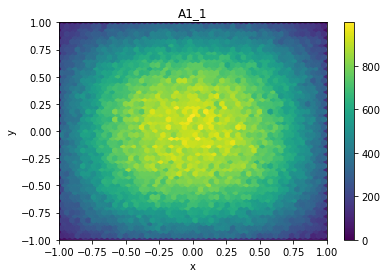

In [1]:
import random, math, pylab

alpha = 0.5
nsamples = 1000000
samples_x = []
samples_y = []
for sample in range(nsamples):
    while True:
        x = random.uniform(-1.0, 1.0)
        y = random.uniform(-1.0, 1.0)
        p = math.exp(-0.5 * (x ** 2 + y ** 2) - alpha * (x ** 4 + y ** 4))
        if random.uniform(0.0, 1.0) < p:
            break
    samples_x.append(x)
    samples_y.append(y)

pylab.hexbin(samples_x, samples_y, gridsize=50, bins=1000)
pylab.axis([-1.0, 1.0, -1.0, 1.0])
cb = pylab.colorbar()
pylab.xlabel('x')
pylab.ylabel('y')
pylab.title('A1_1')
#pylab.savefig('plot_A1_1.png')
pylab.show()

(here you can find the full reference for the hexbin function, which produces and plots a 2D histogram: http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.hexbin)

Now, modify this program so that both the x, y positions are proposed not from a uniform distribution but from a function **gauss_cut()**, a Gaussian with unit standard deviation and zero mean, restricted to the interval [-1.0, 1.0].  Modify the acceptance "p = ...." in the above program to take into account the new proposal probability of (x, y), so that the distribution of accepted points (x,y) is again equal to $\pi(x, y)$. 

For your convenience, the function gauss_cut is provided, but you still have to write the modified program.

**def gauss_cut():<br>
    while True:<br>
        x = random.gauss(0.0, 1.0)<br>
        if abs(x) <= 1.0:<br>
            return x<br>**

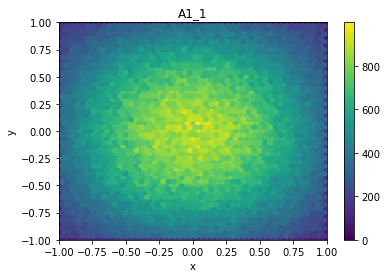

In [2]:
import random, math, pylab

def gauss_cut():
    while True:
        x = random.gauss(0, 1.0)
        if abs(x) <= 1.0:
            return x        
alpha = 0.5
nsamples = 1000000
samples_x = []
samples_y = []
for sample in range(nsamples):
    while True:
        x = gauss_cut()
        y = gauss_cut()
        p = math.exp(-0.5 * (x ** 2 + y ** 2) - alpha * (x ** 4 + y ** 4))
        if gauss_cut() < p:
            break
    samples_x.append(x)
    samples_y.append(y)

pylab.hexbin(samples_x, samples_y, gridsize=50, bins=1000)
pylab.axis([-1.0, 1.0, -1.0, 1.0])
cb = pylab.colorbar()
pylab.xlabel('x')
pylab.ylabel('y')
pylab.title('A1_1')
#pylab.savefig('plot_A1_1.png')
pylab.show()

**A1 (continued)**

- **Explain what you changed, and confirm that your program produces a histogram of $\pi(x, y)$ as in the original program.**

First, the function gauss_cut is added<br>

def gauss_cut():<br>
    while True:<br>
        x = random.gauss(0, 1.0)<br>
        if abs(x) <= 1.0:<br>
            return x   <br>
The position x,y were chosen randomly by the function gauss_cut instead of uniform distribution<br>
 x = gauss_cut()<br>
 y = gauss_cut()<br>

Then the p is selected as in written below, 

p = math.exp(-0.5 * (x ** 2 + y ** 2) - alpha * (x ** 4 + y ** 4))<br>
if gauss_cut() < p:

- **Do the programs of this Section A1   sample the correct distribution pi(x, y) only for positive alpha, or do  they also work for any negative alpha, for example for alpha = -2.0?  (Try them out, if in doubt). Motivate your answer in one sentence.**

**NB:** The algorithms in this Section A1 are pure rejection-sampling algorithms, as discussed in Tutorial 4 (have a look at the reject_direct_gauss_cut.py program in Tutorial 4). There is no Markov-chain element present.

The program works for neagtive alpha, it generates similar type of histogram as above.

**A2**

In Section A1 the probability distribution $\pi(x,y)$ was  broken up into three parts: **a constant times a harmonic part times an  anharmonic part**. Now you break up $\pi(x,y)$ into a product of  one-dimensional distributions. We use the Markov-chain method.

Write a program that, from a given configuration (x,y), moves to a new configuration by either changing x or changing y. In the coordinate that changes, propose the new value of x (or y) as a uniform sample, then accept it with the mixed harmonic and quartic weight $\pi(x,y)$, restricted to the coordinate that changes, for $\alpha = 0.5$. Produce a two-dimensional histogram to visualize the data. 

For your convenience, this program is shown here:


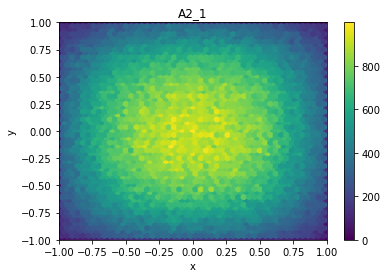

In [3]:
import random, math, pylab

alpha = 0.5
nsteps = 1000000
samples_x = []
samples_y = []
x, y = 0.0, 0.0
for step in range(nsteps):
    if step % 2 == 0:
        while True:
            x = random.uniform(-1.0, 1.0)
            p = math.exp(-0.5 * x ** 2 - alpha * x ** 4 )
            if random.uniform(0.0, 1.0) < p:
                break
    else:
        while True:
            y = random.uniform(-1.0, 1.0)
            p = math.exp(-0.5 * y ** 2 - alpha * y ** 4 )
            if random.uniform(0.0, 1.0) < p:
                break
    samples_x.append(x)
    samples_y.append(y)

pylab.hexbin(samples_x, samples_y, gridsize=50, bins=1000)
pylab.axis([-1.0, 1.0, -1.0, 1.0])
cb = pylab.colorbar()
pylab.xlabel('x')
pylab.ylabel('y')
pylab.title('A2_1')
#pylab.savefig('plot_A2_1.png')
pylab.show()

NB: Study this program carefully. You might be tempted to write 

**p = math.exp(-0.5 * (x ** 2 + y ** 2) - alpha * (x ** 4 + y ** 4))**

rather than <br>
**p = math.exp(-0.5 * x ** 2 - alpha * x ** 4)**  

etc.

Both versions are correct, but the latter one is much faster, because constant factors are taken out.

Now, modify this program once more with a function gauss_cut(). The program should again move either x or y, and you need gauss_cut only in the direction that changes.  Modify the  acceptance "p = ...." so that the  distribution of accepted points (x,y)  is proportional to  $\pi(x,y)$.

- Upload the modified program.

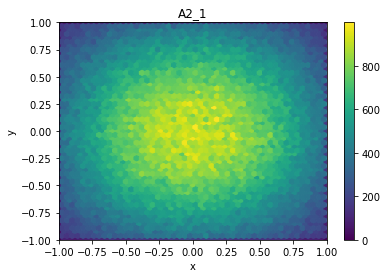

In [4]:
import random, math, pylab

def gauss_cut():
    while True:
        x = random.gauss(0, 1.0)
        if abs(x) <= 1.0:
            return x       
        
alpha = 0.5
nsteps = 1000000
samples_x = []
samples_y = []
x, y = 0.0, 0.0
for step in range(nsteps):
    if step % 2 == 0:
        while True:
            x = gauss_cut()
            p = math.exp(-0.5 * x ** 2 - alpha * x ** 4 )
            if gauss_cut() < p:
                break
    else:
        while True:
            y = gauss_cut()
            p = math.exp(-0.5 * y ** 2 - alpha * y ** 4 )
            if gauss_cut() < p:
                break
    samples_x.append(x)
    samples_y.append(y)

pylab.hexbin(samples_x, samples_y, gridsize=50, bins=1000)
pylab.axis([-1.0, 1.0, -1.0, 1.0])
cb = pylab.colorbar()
pylab.xlabel('x')
pylab.ylabel('y')
pylab.title('A2_1')
#pylab.savefig('plot_A2_1.png')
pylab.show()

- Explain what you changed. The upload of the histograms is not necessary, as they should be very similar to the ones of Section A1.

**NB:** You should analyze your algorithm as "partial freezing" + "direct sampling".  Also note that any distribution in higher dimensions can be treated as  shown here. It is not necessary that pi(x, y) actually factorizes.  Finally, note that what you programmed here is known as "hit-and-run".


First, the function gauss_cut is added<br>

def gauss_cut():<br>
    while True:<br>
        x = random.gauss(0, 1.0)<br>
        if abs(x) <= 1.0:<br>
            return x   <br>
            
The position x,y were chosen randomly by the function gauss_cut instead of uniform distribution<br>
 x = gauss_cut()<br>
 y = gauss_cut()<br>

Then the p is selected as in written below, <br>

if gauss_cut() < p:

**A3**

The programs in Section A2 were Markov-chain programs,  because the outcome of the move depended on the present configuration.  Nevertheless, a direct-sampling approach was used in the coordinate that  was changed. You will now program a full-fledged Markov-chain Monte  Carlo program.

Consider a program that, from a given  configuration (x,y) moves to a new  configuration that is chosen uniformly in the heliport. The new  configuration is accepted with the Metropolis acceptance probability  corresponding to $\pi(x, y)$ with $\alpha = 0.5$.  **Again produce a two-dimensional histogram.**

**For your convenience, this program is shown below:**

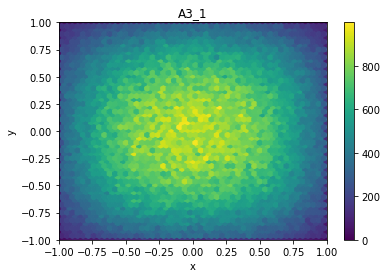

In [5]:
import random, math, pylab

alpha = 0.5
nsteps = 1000000
samples_x = []
samples_y = []
x, y = 0.0, 0.0
for step in range(nsteps):
    xnew = random.uniform(-1.0, 1.0)
    ynew = random.uniform(-1.0, 1.0)
    exp_new = - 0.5 * (xnew ** 2 + ynew ** 2) - alpha * (xnew ** 4 + ynew ** 4)
    exp_old = - 0.5 * (x ** 2 + y ** 2) - alpha * (x ** 4 + y ** 4)
    if random.uniform(0.0, 1.0) < math.exp(exp_new - exp_old):
        x = xnew
        y = ynew
    samples_x.append(x)
    samples_y.append(y)

pylab.hexbin(samples_x, samples_y, gridsize=50, bins=1000)
pylab.axis([-1.0, 1.0, -1.0, 1.0])
cb = pylab.colorbar()
pylab.xlabel('x')
pylab.ylabel('y')
pylab.title('A3_1')
#pylab.savefig('plot_A3_1.png')
pylab.show()

Now again change the program so that the new position is proposed with <br>

**xnew, ynew = gauss_cut(), gauss_cut()**

Adapt the Metropolis algorithm, so that the histogram is again unchanged

**Upload the modified program.**

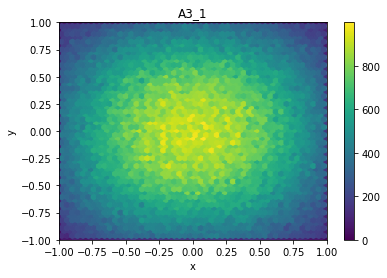

In [6]:
import random, math, pylab

def gauss_cut():
    while True:
        x = random.gauss(0, 1.0)
        if abs(x) <= 1.0:
            return x 
        
alpha = 0.5
nsteps = 1000000
samples_x = []
samples_y = []
x, y = 0.0, 0.0
for step in range(nsteps):
    xnew, ynew = gauss_cut(), gauss_cut()
    exp_new = - 0.5 * (xnew ** 2 + ynew ** 2) - alpha * (xnew ** 4 + ynew ** 4)
    exp_old = - 0.5 * (x ** 2 + y ** 2) - alpha * (x ** 4 + y ** 4)
    if gauss_cut() < math.exp(exp_new - exp_old):
        x = xnew
        y = ynew
    samples_x.append(x)
    samples_y.append(y)

pylab.hexbin(samples_x, samples_y, gridsize=50, bins=1000)
pylab.axis([-1.0, 1.0, -1.0, 1.0])
cb = pylab.colorbar()
pylab.xlabel('x')
pylab.ylabel('y')
pylab.title('A3_1')
#pylab.savefig('plot_A3_1.png')
pylab.show()

**A3 (continued)**

- Explain what you changed, and whether the histogram came out the same.

First, the function gauss_cut is added<br>

def gauss_cut():<br>
    while True:<br>
        x = random.gauss(0, 1.0)<br>
        if abs(x) <= 1.0:<br>
            return x   <br>
            
The new position x,y were chosen randomly by the function gauss_cut instead of uniform distribution<br>
 x_new, y_new = gauss_cut(), gauss_cut()<br>
 
Then the p is selected using the Metropolis algorithm as in written below, <br>

 if gauss_cut() < math.exp(exp_new - exp_old):

- Do the histograms produced by the two programs in this Section A3 agree only for positive alpha, or also for negative alpha (for example alpha = -1.0)? Do an experiment to find out before writing down your answer! Motivate your response in two sentences.

**NB:** It would of course be possible to update x or y individually, as in Section A2. This would implement the "partial freezing" + "Markov-chain sampling".

For alpha = -1.0, histogram is not the same, the width of a gaussian is quite large which could be an indication of partial freezing.

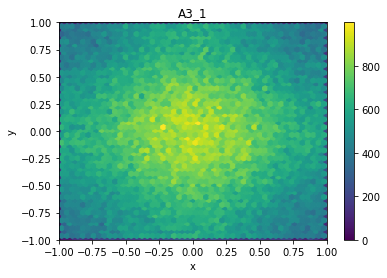

In [7]:
import random, math, pylab

def gauss_cut():
    while True:
        x = random.gauss(0, 1.0)
        if abs(x) <= 1.0:
            return x 
        
alpha = -1.0
nsteps = 1000000
samples_x = []
samples_y = []
x, y = 0.0, 0.0
for step in range(nsteps):
    xnew, ynew = gauss_cut(), gauss_cut()
    exp_new = - 0.5 * (xnew ** 2 + ynew ** 2) - alpha * (xnew ** 4 + ynew ** 4)
    exp_old = - 0.5 * (x ** 2 + y ** 2) - alpha * (x ** 4 + y ** 4)
    if gauss_cut() < math.exp(exp_new - exp_old):
        x = xnew
        y = ynew
    samples_x.append(x)
    samples_y.append(y)

pylab.hexbin(samples_x, samples_y, gridsize=50, bins=1000)
pylab.axis([-1.0, 1.0, -1.0, 1.0])
cb = pylab.colorbar()
pylab.xlabel('x')
pylab.ylabel('y')
pylab.title('A3_1')
#pylab.savefig('plot_A3_1.png')
pylab.show()